<a href="https://colab.research.google.com/github/Nandiniv19/bitcoin/blob/main/Bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn; seaborn.set()
from sklearn.metrics import mean_squared_error
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
 
# Any results you write to the current directory are saved as output.
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!git clone https://github.com/Nandiniv19/bitcoin.git

Cloning into 'bitcoin'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), done.


In [ ]:
pd.read_csv("bitcoin/bitcoin_price_Training - Training.csv")

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
...,...,...,...,...,...,...,...
1551,"May 02, 2013",116.38,125.60,92.28,105.21,-,"1,292,190,000"
1552,"May 01, 2013",139.00,139.89,107.72,116.99,-,"1,542,820,000"
1553,"Apr 30, 2013",144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,"Apr 29, 2013",134.44,147.49,134.00,144.54,-,"1,491,160,000"


In [ ]:
data = pd.read_csv("bitcoin/bitcoin_price_Training - Training.csv")
print(data.head(5))
print(data.tail(5))
data.dtypes
data.info()
data.describe()

           Date     Open     High  ...    Close         Volume      Market Cap
0  Jul 31, 2017  2763.24  2889.62  ...  2875.34    860,575,000  45,535,800,000
1  Jul 30, 2017  2724.39  2758.53  ...  2757.18    705,943,000  44,890,700,000
2  Jul 29, 2017  2807.02  2808.76  ...  2726.45    803,746,000  46,246,700,000
3  Jul 28, 2017  2679.73  2897.45  ...  2809.01  1,380,100,000  44,144,400,000
4  Jul 27, 2017  2538.71  2693.32  ...  2671.78    789,104,000  41,816,500,000

[5 rows x 7 columns]
              Date    Open    High     Low   Close Volume     Market Cap
1551  May 02, 2013  116.38  125.60   92.28  105.21      -  1,292,190,000
1552  May 01, 2013  139.00  139.89  107.72  116.99      -  1,542,820,000
1553  Apr 30, 2013  144.00  146.93  134.05  139.00      -  1,597,780,000
1554  Apr 29, 2013  134.44  147.49  134.00  144.54      -  1,491,160,000
1555  Apr 28, 2013  135.30  135.98  132.10  134.21      -  1,500,520,000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 

,Open,High,Low,Close
count,1556.000000,1556.000000,1556.000000,1556.000000
mean,582.625328,597.992847,567.851446,584.239396
std,523.137312,542.992855,505.877401,525.904442
min,68.500000,74.560000,65.530000,68.430000
25%,254.287500,260.327500,248.835000,254.320000
50%,438.600000,447.560000,430.570000,438.855000
75%,662.437500,674.525000,646.735000,663.402500
max,2953.220000,2999.910000,2840.530000,2958.110000


In [ ]:
data = pd.read_csv("bitcoin/bitcoin_price_Training - Training.csv",index_col= 'Date')
print(data.head(5)) 
data.info()
data.index = pd.to_datetime(data.index)
print(data.index)
data.head(5)

                 Open     High      Low    Close         Volume      Market Cap
Date                                                                           
Jul 31, 2017  2763.24  2889.62  2720.61  2875.34    860,575,000  45,535,800,000
Jul 30, 2017  2724.39  2758.53  2644.85  2757.18    705,943,000  44,890,700,000
Jul 29, 2017  2807.02  2808.76  2692.80  2726.45    803,746,000  46,246,700,000
Jul 28, 2017  2679.73  2897.45  2679.73  2809.01  1,380,100,000  44,144,400,000
Jul 27, 2017  2538.71  2693.32  2529.34  2671.78    789,104,000  41,816,500,000
<class 'pandas.core.frame.DataFrame'>
Index: 1556 entries, Jul 31, 2017 to Apr 28, 2013
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        1556 non-null   float64
 1   High        1556 non-null   float64
 2   Low         1556 non-null   float64
 3   Close       1556 non-null   float64
 4   Volume      1556 non-null   object 
 5   Market Cap  1556 non-null   

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [ ]:
data = data.sort_index()
data.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"


Text(0, 0.5, 'DAily Bitcoin price')

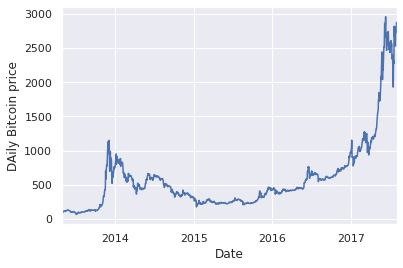

In [ ]:
data['Close'].plot()
plt.ylabel("DAily Bitcoin price")

In [ ]:
data = data['Close']

Text(0, 0.5, 'Weekly bitcoin price')

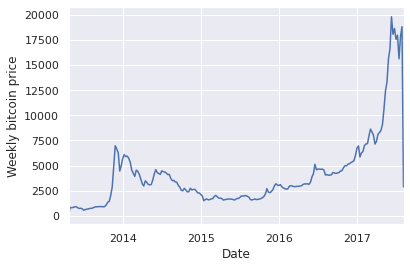

In [ ]:
weekly = data.resample('W').sum()
weekly.plot()
plt.ylabel('Weekly bitcoin price')

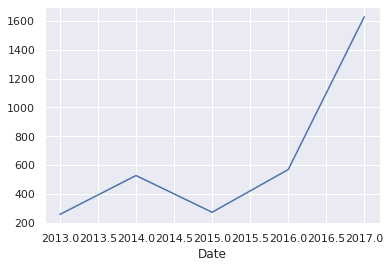

In [ ]:
by_year = data.groupby(data.index.year).mean()
by_year.plot()


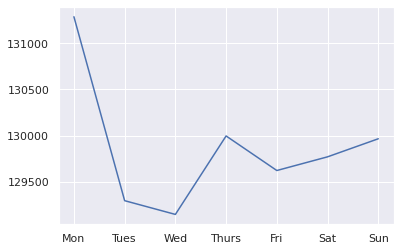

In [ ]:
by_weekday = data.groupby(data.index.dayofweek).sum()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot()

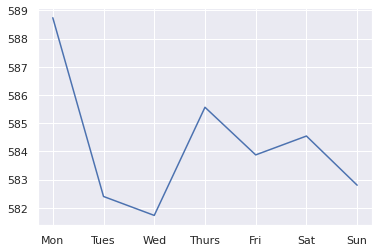

In [ ]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot()

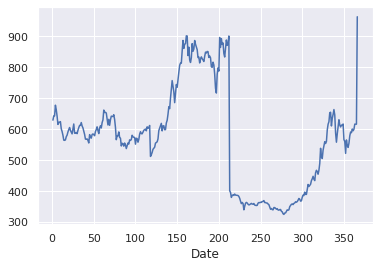

In [ ]:
by_day = data.groupby(data.index.dayofyear).mean()
by_day.plot()

Date
1    AxesSubplot(0.125,0.2;0.775x0.68)
2    AxesSubplot(0.125,0.2;0.775x0.68)
3    AxesSubplot(0.125,0.2;0.775x0.68)
4    AxesSubplot(0.125,0.2;0.775x0.68)
Name: Close, dtype: object

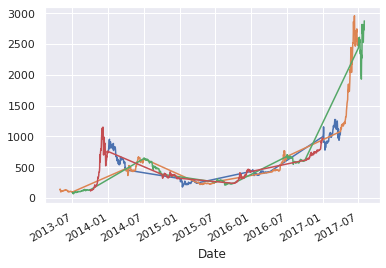

In [ ]:
by_quarter = data.groupby(data.index.quarter)
by_quarter.plot()

In [ ]:
decomposition = seasonal_decompose(ts_logtransformed)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_logtransformed, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

NameError: ignored